In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Forge dataset


X.shape: (26, 2)


/home/ubuntu-server/miniconda3/envs/python_ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


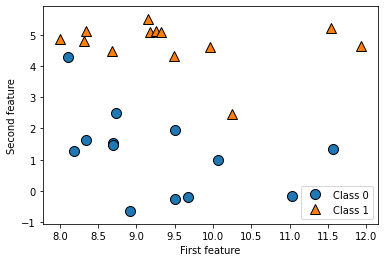

In [3]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0],X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## Wave dataset


Text(0, 0.5, 'Target')

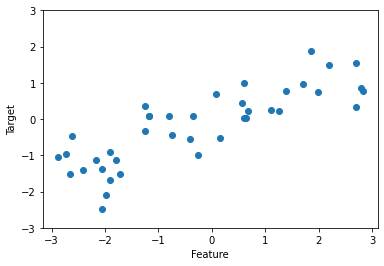

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## Breast Cancer dataset


In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n{}".format(
  {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
print(cancer.target_names, '\n', cancer.target)

['malignant' 'benign'] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1


In [9]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Breast Cancer Classification with _k nearest method_


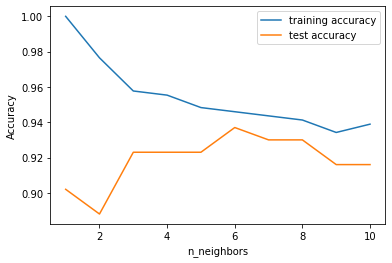

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors 1 to 10

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

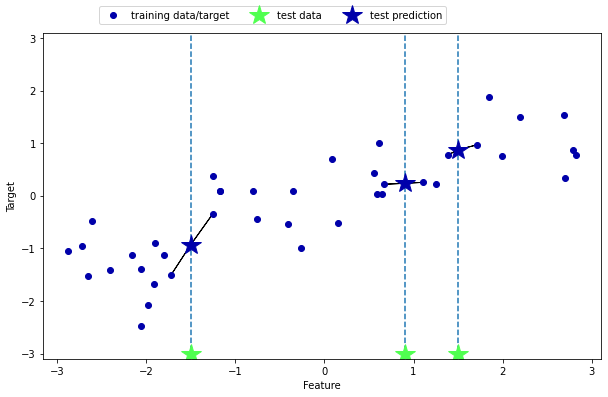

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


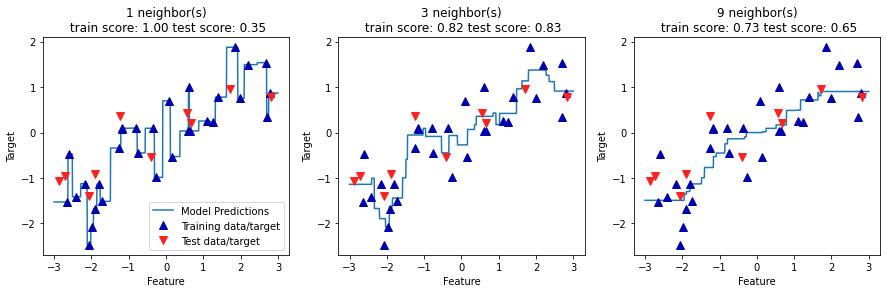

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9],axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train),
      reg.score(X_test, y_test)
    )
  )
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  axes[0].legend(["Model Predictions", "Training data/target","Test data/target"], loc="best")

### Linear Regression


w[0]: 0.393906  b: -0.031804


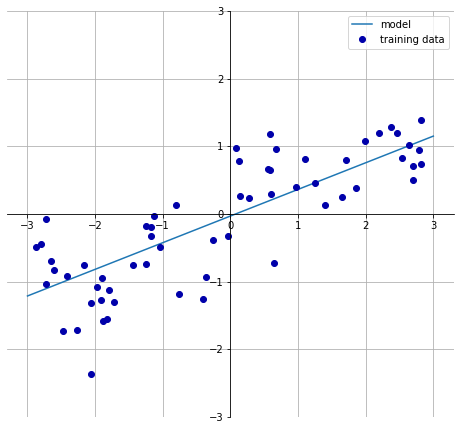

In [15]:
mglearn.plots.plot_linear_regression_wave()

In [16]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


## Boston Housing data Linear Regression


In [17]:
X,y = mglearn.datasets.load_extended_boston()

/home/ubuntu-server/miniconda3/envs/python_ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


/home/ubuntu-server/miniconda3/envs/python_ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/ubuntu-server/miniconda3/envs/python_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


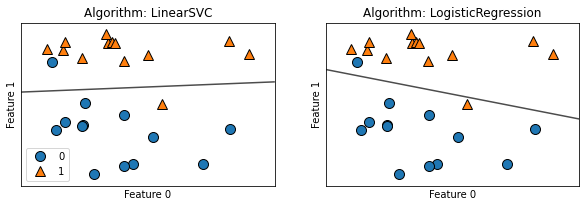

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("Algorithm: {}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend()

In [21]:
a = [1, 2, 3, 4, 5, 6]
b = [.1, .2, .3, .4, .5, .6]
c = [.01, .02, .03, .04, .05, .06]

uni = [a, b, c]
print(uni)

T = []
for ele in zip(*uni[::-1]):
  T.append(ele)

print(T)


[[1, 2, 3, 4, 5, 6], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]]
[(0.01, 0.1, 1), (0.02, 0.2, 2), (0.03, 0.3, 3), (0.04, 0.4, 4), (0.05, 0.5, 5), (0.06, 0.6, 6)]


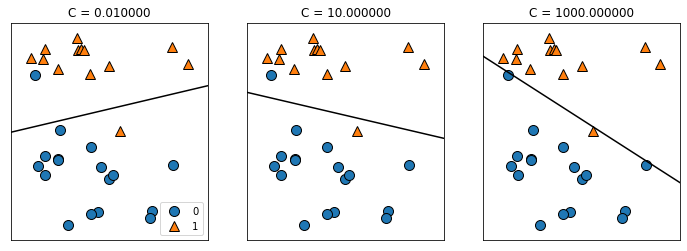

In [22]:
mglearn.plots.plot_linear_svc_regularization()

## Linear SVC

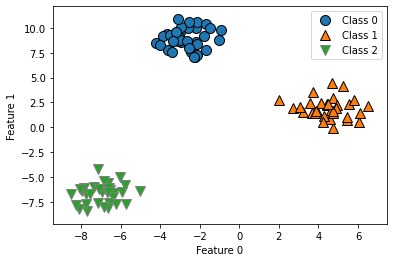

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])


In [24]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape:",linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)


Coefficient shape: (3, 2)
Intercept shape: (3,)


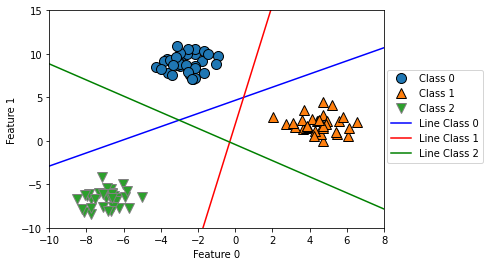

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", "Line Class 2"], loc=(1.01, 0.3))


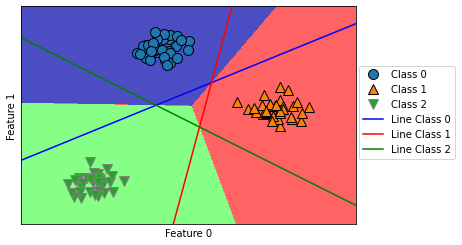

In [26]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line Class 0", "Line Class 1", "Line Class 2"], loc=(1.01, 0.3))


In [27]:
print(linear_svm.coef_)
for e in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
  print(e)


[[-0.17492753  0.23141081]
 [ 0.47622745 -0.06935863]
 [-0.18914173 -0.20400518]]
(array([-0.17492753,  0.23141081]), -1.077458235371262, 'b')
(array([ 0.47622745, -0.06935863]), 0.13137666889327856, 'r')
(array([-0.18914173, -0.20400518]), -0.08605000853224373, 'g')


# Naive Baise Classifier
- GaussianNB
- BernoulliNB
- MultinomialNB

In [28]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])


In [29]:
counts = {}
for label in np.unique(y):
  counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Tree

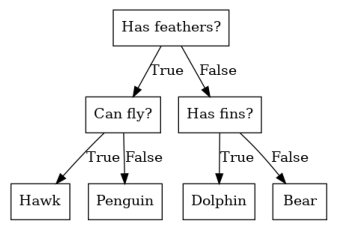

In [30]:
mglearn.plots.plot_animal_tree()

In [31]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [32]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


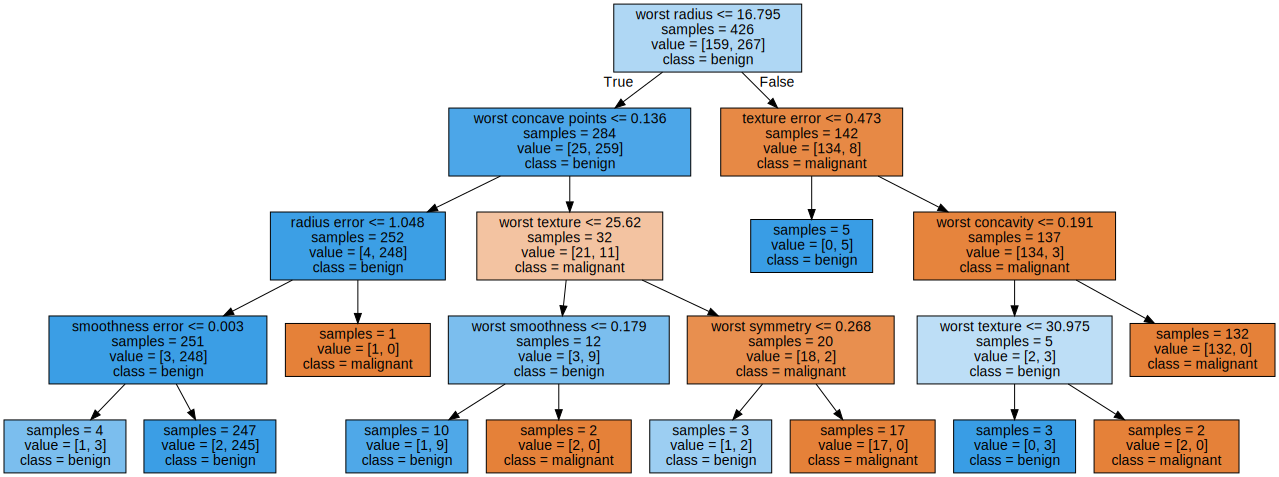

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=["malignant","benign"], feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

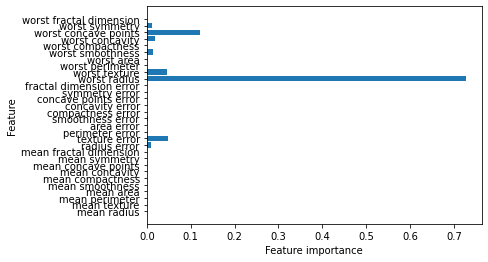

In [36]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


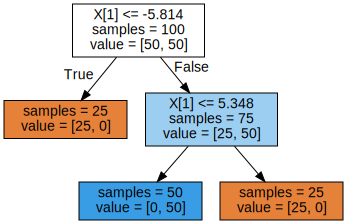

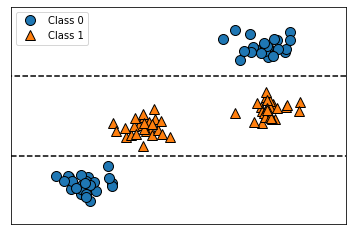

In [38]:
tree = mglearn.plots.plot_tree_not_monotone()

with open('mytree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)
